In [1]:
import matplotlib.pyplot as plt
import numpyro
import numpyro.distributions as dist
from numpyro.contrib.autoguide import AutoDelta
from numpyro.infer.util import init_with_noise, init_to_value
from numpyro.infer.stein import SVGD
import numpyro.infer.kernels as kernels
from numpyro.infer.kernels import SteinKernel
from numpyro.infer import ELBO
import seaborn as sns
import os
import jax
import jax.numpy as np
from random import randint

In [2]:
rng_key = jax.random.PRNGKey(randint(0, int(1e6)))
num_iterations = 6000

In [3]:
def model():
    numpyro.sample('x', dist.MultivariateNormal(loc=np.array([5., 10.]), covariance_matrix=[[3., 5.], 
                                                                                            [5., 10.]]))

In [4]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value({'x': np.array([-10., 30.])}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.RBFKernel(mode='vector'), num_particles=100)
svgd_state = svgd.init(rng_key)

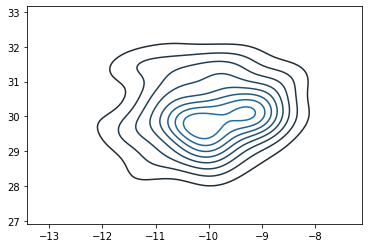

In [5]:
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'][:, 0], svgd.get_params(svgd_state)['auto_x'][:, 1])


In [6]:
svgd_state, loss = svgd.run(rng_key, num_iterations)

SVGD 3.5979: 100%|██████████| 6000/6000 [00:22<00:00, 265.91it/s]


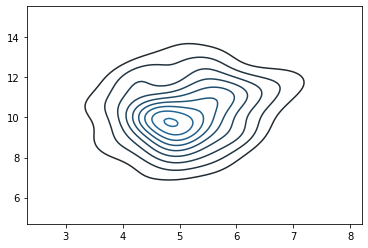

In [7]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'][:, 0], svgd.get_params(svgd_state)['auto_x'][:, 1])

In [8]:
svgd.get_params(svgd_state)['auto_x']

DeviceArray([[ 5.5154557, 12.430594 ],
             [ 5.490698 ,  8.120863 ],
             [ 4.601729 , 12.663484 ],
             [ 4.4153366, 10.248019 ],
             [ 4.6969986,  9.931084 ],
             [ 4.0965614, 11.586625 ],
             [ 5.562344 , 10.442941 ],
             [ 5.7132473, 12.083067 ],
             [ 5.6113276, 10.566145 ],
             [ 4.148575 ,  8.528525 ],
             [ 7.1532354, 11.708792 ],
             [ 5.848803 , 11.336967 ],
             [ 5.130525 ,  8.904501 ],
             [ 3.8051233,  8.45517  ],
             [ 5.150999 ,  9.568776 ],
             [ 4.0144024, 10.39607  ],
             [ 5.213115 , 11.744617 ],
             [ 5.7823663, 11.638253 ],
             [ 5.2761035, 10.367913 ],
             [ 3.8931737, 11.86873  ],
             [ 5.1103787, 10.86151  ],
             [ 5.91326  , 10.524618 ],
             [ 4.4664655, 10.109823 ],
             [ 4.51306  , 10.042592 ],
             [ 4.490613 , 10.826972 ],
             [ 6.3646965,

In [9]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value({'x': np.array([-10., 30.])}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.GraphicalKernel(), num_particles=100)
svgd_state = svgd.init(rng_key)

In [10]:
svgd_state, loss = svgd.run(rng_key, num_iterations)

SVGD 3.5862: 100%|██████████| 6000/6000 [00:22<00:00, 270.26it/s]


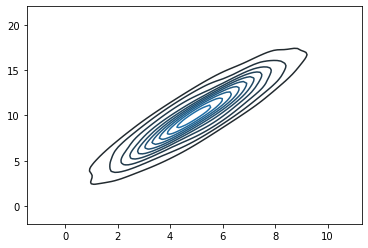

In [11]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'][:, 0], svgd.get_params(svgd_state)['auto_x'][:, 1])